In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.api as sm
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam JOIN chiisat ON vam.school_id = chiisat.school_id WHERE vam.grade = %s AND vam.year = %s AND chiisat.grade = %s AND chiisat.year = %s ORDER BY vam.school_id;"

data = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['4th Grade','2011','4th Grade','2011'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

data[:3]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color,school_name,school_id,unit,network,grade,year,readme,mathme,compme,readexc,mathexc,compexc,readmeet,mathmeet,compmeet,readblw,mathblw,compblw,readwrn,mathwrn,compwrn,readtst,mathtst
0,"LOCKE, A CHTR",400011,Garfield-Humboldt,4th Grade,2011,46.0,-0.1,-1 to 0.7,39,yellow,46.0,-1.0,-1.7 to -0.4,14,red,"LOCKE, A CHTR",400011,4730,Charter,4th Grade,2011,76.1,89.1,78.5,28.3,15.2,17.0,47.8,73.9,61.5,21.7,10.9,19.3,2.2,0,2.2,46,46
1,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Burnham Park,4th Grade,2011,72.8,-0.4,-1.1 to 0.3,32,yellow,72.8,0.2,-0.4 to 0.7,57,yellow,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,3990,Charter,4th Grade,2011,63.5,90.5,72.1,13.5,21.6,12.6,50.0,68.9,59.5,36.5,9.5,27.5,0.0,0,0.5,74,74
2,CATALYST CHTR - HOWLAND,400020,Austin-North Lawndale,4th Grade,2011,42.1,-1.3,-2.2 to -0.4,9,red,42.1,-0.8,-1.5 to -0.1,21,red,CATALYST CHTR - HOWLAND,400020,4370,Charter,4th Grade,2011,45.5,70.5,54.5,2.3,6.8,3.0,43.2,63.6,51.5,54.5,29.5,41.7,0.0,0,3.8,44,44


In [4]:
data.dtypes
#Check if sql request was successful - yes, number matches that found in excel
#data.info()

school_name                object
school_id                  object
network                    object
grade                      object
year                       object
reading_studentsnumber    float64
reading_vam               float64
reading_confidence         object
reading_percentile        float64
reading_color              object
math_studentsnumber       float64
math_vam                  float64
math_confidence            object
math_percentile           float64
math_color                 object
school_name                object
school_id                  object
unit                       object
network                    object
grade                      object
year                       object
readme                    float64
mathme                    float64
compme                    float64
readexc                   float64
mathexc                   float64
compexc                   float64
readmeet                  float64
mathmeet                  float64
compmeet      

In [5]:
data.shape

(424, 38)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     105.2
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           3.45e-22
Time:                        21:55:26   Log-Likelihood:                -1749.0
No. Observations:                 424   AIC:                             3502.
Df Residuals:                     422   BIC:                             3510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     62.2464      0.729     85.411      0.000        60.814    63.679
x              7.5849      0.739     10.257      0.000         6.131     9.038
==============================================================================
Omnibus:                        7.042   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                5.008
Skew:                           0.132   Prob(JB):                       0.0818
Kurtosis:                       2.538   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

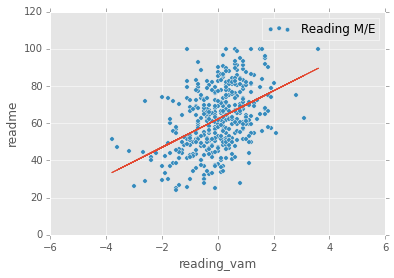

In [6]:
x = data['reading_vam']
y = data['readme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readme',label="Reading M/E")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     77.49
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           3.47e-17
Time:                        21:55:34   Log-Likelihood:                -1761.2
No. Observations:                 424   AIC:                             3526.
Df Residuals:                     422   BIC:                             3535.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     19.1218      0.750     25.492      0.000        17.647    20.596
x              6.6997      0.761      8.803      0.000         5.204     8.196
==============================================================================
Omnibus:                      174.540   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              685.843
Skew:                           1.842   Prob(JB):                    1.18e-149
Kurtosis:                       8.025   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

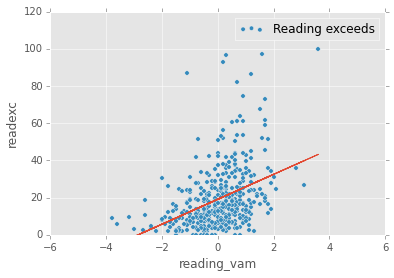

In [7]:
x = data['reading_vam']
y = data['readexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readexc',label="Reading exceeds")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.858
Date:                Sat, 15 Aug 2015   Prob (F-statistic):             0.0917
Time:                        21:55:41   Log-Likelihood:                -1602.3
No. Observations:                 424   AIC:                             3209.
Df Residuals:                     422   BIC:                             3217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     43.1289      0.516     83.640      0.000        42.115    44.142
x              0.8845      0.523      1.691      0.092        -0.144     1.913
==============================================================================
Omnibus:                       54.865   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.782
Skew:                          -0.745   Prob(JB):                     2.91e-23
Kurtosis:                       4.912   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

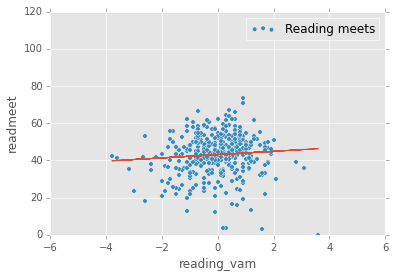

In [8]:
x = data['reading_vam']
y = data['readmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readmeet',label="Reading meets")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     97.07
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           9.48e-21
Time:                        21:55:48   Log-Likelihood:                -1724.2
No. Observations:                 424   AIC:                             3452.
Df Residuals:                     422   BIC:                             3461.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     35.9743      0.687     52.333      0.000        34.623    37.325
x             -6.8720      0.697     -9.852      0.000        -8.243    -5.501
==============================================================================
Omnibus:                        5.591   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.170
Skew:                          -0.117   Prob(JB):                        0.124
Kurtosis:                       2.574   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

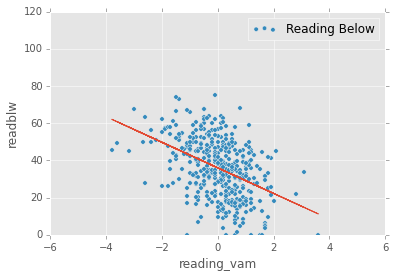

In [9]:
x = data['reading_vam']
y = data['readblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readblw',label="Reading Below")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     41.33
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           3.48e-10
Time:                        21:55:54   Log-Likelihood:                -945.17
No. Observations:                 424   AIC:                             1894.
Df Residuals:                     422   BIC:                             1902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.7807      0.109     16.268      0.000         1.566     1.996
x             -0.7141      0.111     -6.429      0.000        -0.932    -0.496
==============================================================================
Omnibus:                      104.152   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.837
Skew:                           1.384   Prob(JB):                     1.34e-42
Kurtosis:                       4.803   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

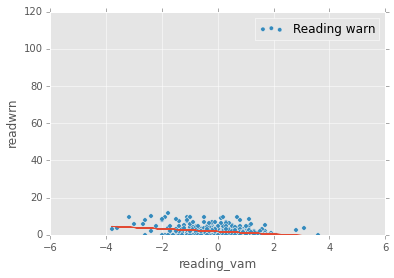

In [10]:
x = data['reading_vam']
y = data['readwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readwrn',label="Reading warn")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     90.64
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.36e-19
Time:                        21:56:01   Log-Likelihood:                -1621.9
No. Observations:                 423   AIC:                             3248.
Df Residuals:                     421   BIC:                             3256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     80.7839      0.546    148.015      0.000        79.711    81.857
x              5.1738      0.543      9.521      0.000         4.106     6.242
==============================================================================
Omnibus:                       13.687   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.019
Skew:                          -0.420   Prob(JB):                     0.000903
Kurtosis:                       2.701   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

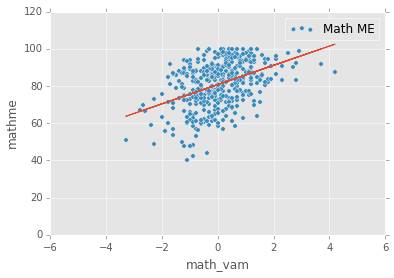

In [11]:
x = data['math_vam']
y = data['mathme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()
#print(lm.params.Intercept)
#print(lm.params.x)
#print(lm.params)

data.plot(kind='scatter', x='math_vam', y='mathme',label="Math ME")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     56.48
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           3.45e-13
Time:                        21:56:09   Log-Likelihood:                -1748.4
No. Observations:                 423   AIC:                             3501.
Df Residuals:                     421   BIC:                             3509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.3525      0.736     23.577      0.000        15.906    18.799
x              5.5075      0.733      7.515      0.000         4.067     6.948
==============================================================================
Omnibus:                      185.577   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              756.679
Skew:                           1.967   Prob(JB):                    4.89e-165
Kurtosis:                       8.239   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

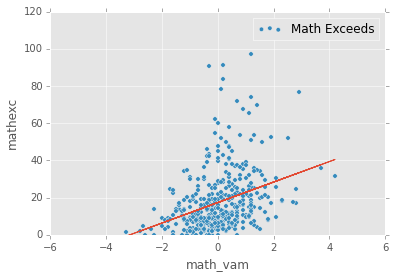

In [12]:
x = data['math_vam']
y = data['mathexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathexc',label="Math Exceeds")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3110
Date:                Sat, 15 Aug 2015   Prob (F-statistic):              0.577
Time:                        21:56:15   Log-Likelihood:                -1661.1
No. Observations:                 423   AIC:                             3326.
Df Residuals:                     421   BIC:                             3334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     63.4354      0.599    105.928      0.000        62.258    64.613
x             -0.3325      0.596     -0.558      0.577        -1.505     0.840
==============================================================================
Omnibus:                      116.061   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.784
Skew:                          -1.302   Prob(JB):                     4.91e-71
Kurtosis:                       6.404   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

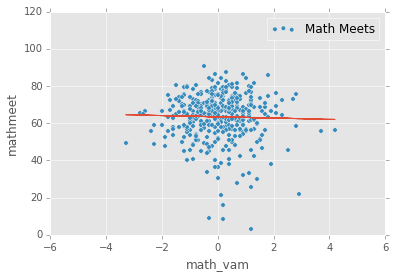

In [13]:
x = data['math_vam']
y = data['mathmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathmeet',label="Math Meets")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     90.23
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.62e-19
Time:                        21:56:20   Log-Likelihood:                -1559.1
No. Observations:                 423   AIC:                             3122.
Df Residuals:                     421   BIC:                             3130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.1062      0.470     36.361      0.000        16.181    18.031
x             -4.4495      0.468     -9.499      0.000        -5.370    -3.529
==============================================================================
Omnibus:                       10.610   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.782
Skew:                           0.367   Prob(JB):                      0.00456
Kurtosis:                       2.729   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

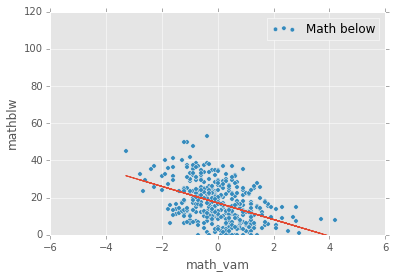

In [14]:
x = data['math_vam']
y = data['mathblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathblw',label="Math below")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     30.94
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           4.74e-08
Time:                        21:56:30   Log-Likelihood:                -1016.7
No. Observations:                 423   AIC:                             2037.
Df Residuals:                     421   BIC:                             2045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.1088      0.131     16.158      0.000         1.852     2.365
x             -0.7228      0.130     -5.562      0.000        -0.978    -0.467
==============================================================================
Omnibus:                      150.118   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              422.957
Skew:                           1.716   Prob(JB):                     1.43e-92
Kurtosis:                       6.496   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

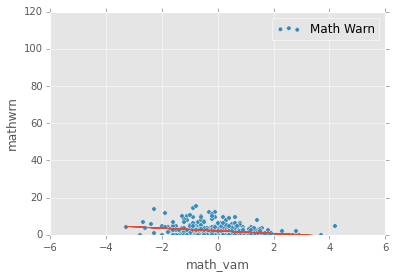

In [15]:
x = data['math_vam']
y = data['mathwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathwrn',label="Math Warn")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()